# Feature Engineering

Feature engineering is the act of taking raw data and extracting features from it that are suitable for tasks like machine learning. Most machine learning algorithms work with tabular data. When we talk about features, we are referring to the information stored in the columns of these tables. 

Most machine learning algorithms require their input data to be represented as a vector or a matrix, and many assume that the data is distributed normally. In the real world, more often than not you will receive data that is not in this format. You will also need to work with many different types of data, some data types you will often encounter are: continuous variables, categorical data, ordinal data, boolean values, and dates and times. Dealing with these is manageable, but requires a well thought out approach. Feature engineering is often overlooked in machine learning discussions, but any real-world practitioner will confirm that data manipulation and feature engineering is the most important aspect of the project.

## Load Lib 

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

#import tensorflow as tf 
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import lightgbm as lgbm
#from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
#import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
set_config(display='diagram')
warnings.filterwarnings('ignore')


# Load the data

In [2]:
%%time 
train = pd.read_csv('../input/GiveMeSomeCredit/cs-training.csv')
test = pd.read_csv('../input/GiveMeSomeCredit/cs-test.csv')
train.head(3)

CPU times: user 250 ms, sys: 76.6 ms, total: 327 ms
Wall time: 467 ms


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


# Convert Dtypes :

In [3]:
# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))
# Convert Dtypes :
test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
test[test.select_dtypes(['object','category']).columns] = test.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

# Reduce Memory

In [4]:
# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
train= reduce_mem_usage(train)
test= reduce_mem_usage(test)

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%
Memory usage of dataframe is 9.29 MB
Memory usage after optimization is: 2.90 MB
Decreased by 68.7%


# X and Y

In [5]:
# Cardinality : 
# - RevolvingUtilizationOfUnsecuredLines :125728, high Outlier
# - DebtRatio :114194 , high Outlier 
# deal with outlier + bin 
PERCENTAGE = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]
# MonthlyIncome:13594 , high outlier +bin 
REAL= ["MonthlyIncome"]
# Can be considred as cat 
NUMERIC_DISCRET_low = ["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
Late_Pay_Cols = ['NumberOfTime30-59DaysPastDueNotWorse',
                 'NumberOfTimes90DaysLate',
                 'NumberOfTime60-89DaysPastDueNotWorse']
TARGET = ["SeriousDlqin2yrs"]

#also change the type for TARGET to categorical
#df[TARGET] = df[TARGET].astype('category')

In [6]:
y = train['SeriousDlqin2yrs']

In [7]:
def get_outlier_counts(df, outlier_threshold=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    outlier_counts = ((df < (Q1 - outlier_threshold * IQR)) | (df > (Q3 + outlier_threshold * IQR))).sum()
    return outlier_counts[outlier_counts>0].sort_values(ascending=False)

get_outlier_counts(train, outlier_threshold=3)

DebtRatio                               30457
NumberOfTime30-59DaysPastDueNotWorse    23982
SeriousDlqin2yrs                        10026
NumberOfTimes90DaysLate                  8338
NumberOfTime60-89DaysPastDueNotWorse     7604
MonthlyIncome                            1557
NumberOfDependents                        991
NumberOfOpenCreditLinesAndLoans           442
RevolvingUtilizationOfUnsecuredLines      339
NumberRealEstateLoansOrLines              209
dtype: int64

# Relationship between missing data and target
Let's evaluate the target  observations where the information is missing. We will do this for each variable that shows missing data.
if there a relation we should mention this as new feature.

In [8]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in train.columns if train[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

train[vars_with_na].isnull().mean().sort_values(ascending=False)

MonthlyIncome         0.198207
NumberOfDependents    0.026160
dtype: float64

In [9]:
def analyse_na_value(df, var):

    # copy of the dataframe, so that we do not override the original data
    # see the link for more details about pandas.copy()
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where data is available

    # determine the median price in the groups 1 and 0,
    # and the standard deviation of the sale price,
    # and we capture the results in a temporary dataset
    tmp = df.groupby(var)['SeriousDlqin2yrs'].agg(['mean', 'std','count'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="SeriousDlqin2yrs", color='green')

    plt.show()

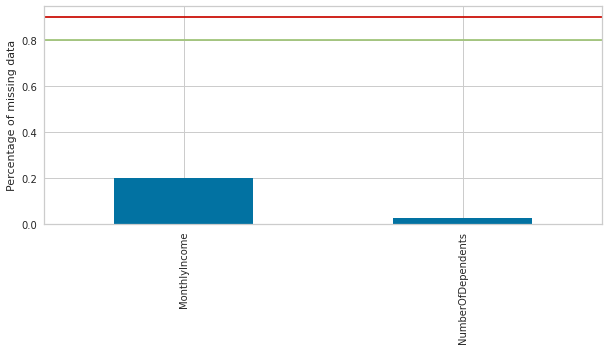

In [10]:
# plot
train[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')


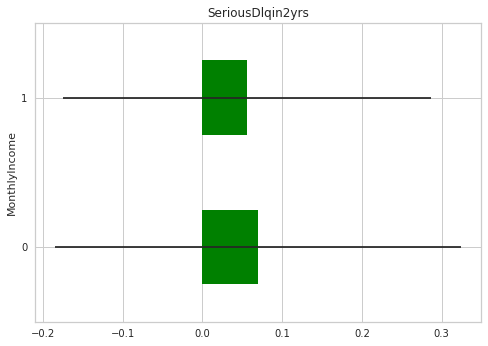

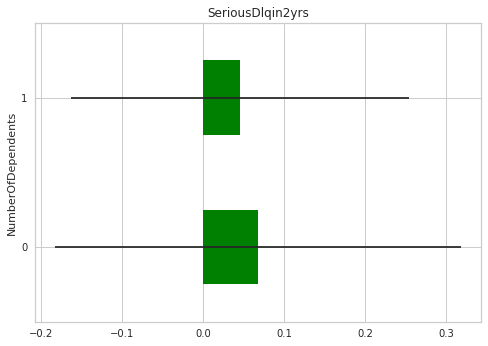

In [11]:
# let's run the function on each variable with missing data

for var in vars_with_na:
    analyse_na_value(train, var)

In some variables, the average SeriousDlqin2yrs  in our data  where the information is missing, differs from the average SeriousDlqin2yrsin data where information exists. This suggests that data being missing could be a good predictor of credit fault .
For this we should keep add indicator when we have missing value .

# Imput before Descritaziation : 

## IterativeImputer


In [12]:
%%time 
param =  {   "verbosity": 0,
            #"objective": "binary:logistic",
            #"eval_metric": "auc",
            'random_state': 42,
            # regression
            'objective':'reg:squarederror', 
             'eval_metric': 'mae',
            #early_stopping_rounds=100 ,
            #'gpu_id':0, 
            #'predictor':"gpu_predictor",
            # use exact for small dataset.
            #"tree_method": "exact",
            # big data :
            # 'tree_method': 'gpu_hist',
            # defines booster, gblinear for linear functions.
             'booster': 'gbtree', 
            'lambda': 8.544792472633987e-07,
            'alpha': 0.31141671752487043,
            'subsample': 0.8779467596981366, 
            'colsample_bytree': 0.9759532762677546,
            'learning_rate': 0.008686087328805853, 
            'n_estimators': 6988,
            'max_depth': 9,
            'min_child_weight': 2, 
            'eta': 3.7603213457541647e-06,
            'gamma': 2.1478058456847449e-07,
            'grow_policy': 'lossguide'}
                

#model_xgb = XGBRegressor(
       #objective="mae",
 #   **xgb_params2)

numeric_transformer1 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
numeric_transformer2 = Pipeline(
                            steps=[
                            #('imputer', SimpleImputer(strategy='median'
                             #                         ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )

pipe_xgbr1 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer1),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )
pipe_xgbr2 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer2),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )

#imputer=IterativeImputer(estimator=XGBRegressor(
#                      #objective="mae",
 #                     **param),max_iter=2,
  #                       add_indicator=True,
   #                      random_state=42)
#train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
#test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
#imputer.fit(train)
#train = imputer.transform(train)
#test = imputer.transform(test)
#features=['RevolvingUtilizationOfUnsecuredLines', 'age',
#      'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
 #      'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
 #     'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
 #     'NumberOfDependents']
#train=pd.DataFrame(train,columns=features)
#test=pd.DataFrame(test,columns=features)
#train= reduce_mem_usage(train)
#test= reduce_mem_usage(test)

CPU times: user 542 µs, sys: 0 ns, total: 542 µs
Wall time: 551 µs


## Rgression Imputer 

In [13]:
%%time 
train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
train_final= pd.concat( [train, test], axis=0) 
#testdf_income= train_final[train_final['MonthlyIncome'].isnull()==True]
traindf_income = train_final[train_final['MonthlyIncome'].isnull()==False]
y_income = traindf_income['MonthlyIncome']
X_income=traindf_income.drop(["MonthlyIncome"],axis=1)
pipe_xgbr1.fit(X_income, y_income)
train_income_missing=train[train['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
test_income_missing=test[test['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
train_predicted = pipe_xgbr1.predict(train_income_missing)
test_predicted = pipe_xgbr1.predict(test_income_missing)
train.loc[(train.MonthlyIncome.isnull()), 'MonthlyIncome'] = train_predicted
test.loc[(test.MonthlyIncome.isnull()), 'MonthlyIncome'] = test_predicted

CPU times: user 1h 14min 12s, sys: 6.37 s, total: 1h 14min 18s
Wall time: 19min 1s


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float16
 1   age                                   150000 non-null  int8   
 2   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int8   
 3   DebtRatio                             150000 non-null  float32
 4   MonthlyIncome                         150000 non-null  float32
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int8   
 6   NumberOfTimes90DaysLate               150000 non-null  int8   
 7   NumberRealEstateLoansOrLines          150000 non-null  int8   
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int8   
 9   NumberOfDependents                    146076 non-null  float16
dtypes: float16(2), float32(2), int8(6)
memory usage: 2.6 MB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float16
 1   age                                   101503 non-null  int8   
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int8   
 3   DebtRatio                             101503 non-null  float32
 4   MonthlyIncome                         101503 non-null  float32
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int8   
 6   NumberOfTimes90DaysLate               101503 non-null  int8   
 7   NumberRealEstateLoansOrLines          101503 non-null  int8   
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int8   
 9   NumberOfDependents                    98877 non-null   float16
dtypes: float16(2), float32(2), int8(6)
memory usage: 1.7 MB


In [16]:
%%time 
traindf_NumberOfDependents = train_final[train_final['NumberOfDependents'].isnull()==False]
y_NumberOfDependents = traindf_NumberOfDependents['NumberOfDependents']
X_NumberOfDependents=traindf_NumberOfDependents.drop(["NumberOfDependents"],axis=1)
pipe_xgbr2.fit(X_NumberOfDependents, y_NumberOfDependents)
train_NumberOfDependents_missing=train[train['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
test_NumberOfDependents_missing=test[test['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
train_predicted = pipe_xgbr2.predict(train_NumberOfDependents_missing)
test_predicted = pipe_xgbr2.predict(test_NumberOfDependents_missing)
train.loc[(train.NumberOfDependents.isnull()), 'NumberOfDependents'] = train_predicted
test.loc[(test.NumberOfDependents.isnull()), 'NumberOfDependents'] = test_predicted

CPU times: user 1h 29min 57s, sys: 5.67 s, total: 1h 30min 3s
Wall time: 23min 1s


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float16
 1   age                                   150000 non-null  int8   
 2   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int8   
 3   DebtRatio                             150000 non-null  float32
 4   MonthlyIncome                         150000 non-null  float32
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int8   
 6   NumberOfTimes90DaysLate               150000 non-null  int8   
 7   NumberRealEstateLoansOrLines          150000 non-null  int8   
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int8   
 9   NumberOfDependents                    150000 non-null  float16
dtypes: float16(2), float32(2), int8(6)
memory usage: 2.6 MB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float16
 1   age                                   101503 non-null  int8   
 2   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int8   
 3   DebtRatio                             101503 non-null  float32
 4   MonthlyIncome                         101503 non-null  float32
 5   NumberOfOpenCreditLinesAndLoans       101503 non-null  int8   
 6   NumberOfTimes90DaysLate               101503 non-null  int8   
 7   NumberRealEstateLoansOrLines          101503 non-null  int8   
 8   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int8   
 9   NumberOfDependents                    101503 non-null  float16
dtypes: float16(2), float32(2), int8(6)
memory usage: 1.7 MB


# Features Engineer1
## Add Bin 
It's always good to bin data when we have lot of outlier and skweness 

In [19]:
# Add bin data 
# initializing append_str
append_str = 'cat_'
# Append suffix / prefix to strings in list
num_features1=["RevolvingUtilizationOfUnsecuredLines", "DebtRatio","MonthlyIncome"]
num_features2=["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
cat_features1 = [append_str + sub for sub in num_features1]
cat_features2 = [append_str + sub for sub in num_features2]

# create the discretizer object with strategy quantile and 1000 bins
discretizer1 = KBinsDiscretizer(n_bins=40, encode='ordinal',strategy='quantile')
discretizer2 = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile')

pipeline1 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer1)
    ])
# fit the discretizer to the train set
pipeline1.fit(train.loc[:,num_features1])
# apply the discretisation
train_cat1 = pipeline1.transform(train.loc[:,num_features1])
test_cat1 = pipeline1.transform(test.loc[:,num_features1])
train_df1=pd.DataFrame(train_cat1,columns=cat_features1).astype('category')
test_df1=pd.DataFrame(test_cat1,columns=cat_features1).astype('category')
train_final1= pd.concat( [train.loc[:,num_features1], train_df1], axis=1) 
test_final1= pd.concat( [test.loc[:,num_features1], test_df1], axis=1) 

pipeline2 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer2)
    ])
# fit the discretizer to the train set
pipeline2.fit(train.loc[:,num_features2])
# apply the discretisation
train_cat2 = pipeline2.transform(train.loc[:,num_features2])
test_cat2 = pipeline2.transform(test.loc[:,num_features2])
train_df2=pd.DataFrame(train_cat2,columns=cat_features2).astype('category')
test_df2=pd.DataFrame(test_cat2,columns=cat_features2).astype('category')
train_final2= pd.concat( [train.loc[:,num_features2], train_df2], axis=1) 
test_final2= pd.concat( [test.loc[:,num_features2], test_df2], axis=1) 

In [20]:
train_final= pd.concat( [train_final1, train_final2], axis=1) 
test_final= pd.concat( [test_final1, test_final2], axis=1) 

# Final X and y

In [21]:
# Pour le train test
target= "SeriousDlqin2yrs"
X = train_final# axis=1
X_test_final =test_final# axis=1

In [22]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines      101503 non-null  float16 
 1   DebtRatio                                 101503 non-null  float32 
 2   MonthlyIncome                             101503 non-null  float32 
 3   cat_RevolvingUtilizationOfUnsecuredLines  101503 non-null  category
 4   cat_DebtRatio                             101503 non-null  category
 5   cat_MonthlyIncome                         101503 non-null  category
 6   NumberOfDependents                        101503 non-null  float16 
 7   NumberOfTime60-89DaysPastDueNotWorse      101503 non-null  int8    
 8   NumberRealEstateLoansOrLines              101503 non-null  int8    
 9   NumberOfTimes90DaysLate                   101503 non-null  int8    
 10  NumberOf

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines      150000 non-null  float16 
 1   DebtRatio                                 150000 non-null  float32 
 2   MonthlyIncome                             150000 non-null  float32 
 3   cat_RevolvingUtilizationOfUnsecuredLines  150000 non-null  category
 4   cat_DebtRatio                             150000 non-null  category
 5   cat_MonthlyIncome                         150000 non-null  category
 6   NumberOfDependents                        150000 non-null  float16 
 7   NumberOfTime60-89DaysPastDueNotWorse      150000 non-null  int8    
 8   NumberRealEstateLoansOrLines              150000 non-null  int8    
 9   NumberOfTimes90DaysLate                   150000 non-null  int8    
 10  NumberOf

# Features Engineer2
## Create some combination  between features 

In [24]:
del train
del test 
del train_final
del test_final

# Extract final cat  and num Features 
## Cat Features 

In [25]:
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
cat_columns

Index(['cat_RevolvingUtilizationOfUnsecuredLines', 'cat_DebtRatio',
       'cat_MonthlyIncome', 'cat_NumberOfDependents',
       'cat_NumberOfTime60-89DaysPastDueNotWorse',
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object')

**Num Features**



In [26]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
num_columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object')

In [27]:
class FeaturesEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X=X.copy()
        # Calculate some metrics across rows
        X["num_missing"]  = X.isnull().sum(axis=1)
        X["std_row"] = X.std(axis=1)
        X["sem_row"] = X.sem(axis=1)
        X["abs_sum_row"] = X.abs().sum(axis=1)
        X["mean_row"] = X.mean(axis=1)
        X["max_row"]= X.max(axis=1)
        X["min_row"]= X.min(axis=1)
        X['Weighted_Sum_PastDue'] = 2 * X['NumberOfTime30-59DaysPastDueNotWorse'] + 3 * X['NumberOfTime60-89DaysPastDueNotWorse'] + 6 * X['NumberOfTimes90DaysLate']
        X['90days_out_of_TotalPastDue'] = X['NumberOfTimes90DaysLate'] / (X['Weighted_Sum_PastDue'])
        X.loc[X['Weighted_Sum_PastDue']==0, '90days_out_of_TotalPastDue'] = 0
        X['RemainingLines'] = X['NumberOfOpenCreditLinesAndLoans'] - X['NumberRealEstateLoansOrLines']
        X['Loans_vs_Other_Lines'] = X['RemainingLines'] / (1 + X['NumberRealEstateLoansOrLines'])
        X['Debt_per_Real_Estate_Loan'] = X['DebtRatio'] / X['NumberRealEstateLoansOrLines']
        X.loc[X['NumberRealEstateLoansOrLines']==0, 'Debt_per_Real_Estate_Loan'] = 0
        X['Disposable_Income_per_person'] = (X['MonthlyIncome'] - X['DebtRatio']) / (X['NumberOfDependents'] + 1)
        X.loc[X['NumberOfDependents']==0, 'Disposable_Income_per_person'] = 0
        X['RemainingLines_per_person'] = X['RemainingLines'] / (X['NumberOfDependents'] + 1)
        X['NumberRE_X_DebtRatio_X_age'] = X['NumberRealEstateLoansOrLines'] * X['DebtRatio'] / X['age']
        X['RevolvingUtilization_per_age'] = X['RevolvingUtilizationOfUnsecuredLines'] / X['age']
        X[X==np.inf]=np.nan
        X=reduce_mem_usage(X)
        return X  


# Features Engineer3
# Poly features + Sparse Features + Kmeans 


In [28]:
class MiniKmeansTransformerEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 11, encoder=ce.woe.WOEEncoder()):
        self.num_clusters = num_clusters
        self.encoder= encoder
        if self.num_clusters > 0:
            self.kmeans = MiniBatchKMeans(n_clusters=self.num_clusters, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
            preds=self.kmeans.predict(X)
            preds=pd.DataFrame(preds, columns=['kmeans']).astype('category')
            self.encoder.fit(preds,y)
        return self
    
    def transform(self, X, y=None):
        pred_classes = self.kmeans.predict(X)
        pred_classes=pd.DataFrame(pred_classes, columns=['kmeans']).astype('category')
        pred_encoded = self.encoder.transform(pred_classes)
        return np.hstack((X, pred_encoded))
        #return pred_encoded

In [29]:
class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator
    
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)
            
        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])
            
        spi = self._create_sparse_interactions(X)
        return spi
    
    
    def get_feature_names(self):
        return self.feature_names
    
    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()
        
        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)
                
                # get column multiplications value
                out = X[:, col_ixs[0]]    
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)
    

# Complete Pipe 

1. Features Engineer

1. Kmeans

1. Sparse

1. Poly

1. Scaler/Transformer

1. imput

In [30]:
# Cat pipeline
categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.woe.WOEEncoder()),#(Numerical Input, Categorical Output)
                        #('sparse_features', SparseInteractions(degree=2)),
                        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            #('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns),
               # ('categorical', categorical_transformer, cat_columns)
            ])

# Pipe V15 num+ poly +kmeans 

In [31]:
preprocessor_woe_powertransformer

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('scaler', PowerTransformer()),
                                                 ('polynominal_features',
                                                  PolynomialFeatures()),
                                                 ('kmeans',
                                                  MiniKmeansTransformerEncoder())]),
                                 Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])

In [32]:
lgbm_param={'learning_rate': 0.0018069834369607075,
                             'max_depth': 8,
                             #'max_features': 4,
                             'min_samples_leaf': 47,
                             #'min_samples_split': 389,
                             'subsample': 0.8573598985000007,
                             #'n_iter_no_change': 300,
                             'n_estimators': 5000,
                            # 'verbose': 0,
                             'random_state': 42,
                             'metric': 'auc',
                            #"device_type" : "gpu",
                            'boosting_type': 'gbdt',
                           # 'tree_method': "gpu_hist"
                           }

pipe_lgbm_woe_powertransformer = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',
         lgbm.LGBMClassifier( 
            #n_jobs=-1,
                                           verbose=-1,
                                           **lgbm_param))
    ]
)
pipe_lgbm_woe_powertransformer

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

# Test Pipes with CV 

In [33]:
def plot_roc(y,y_pred):
    from sklearn.metrics import auc
    fpr, tpr, thresholds = roc_curve(y_true=y, y_score=y_pred)
    auc = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Model(area = {:.3f})'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 0 | AUC: 0.8657539562494199
Fold 0 | AP: 0.4047756473151977


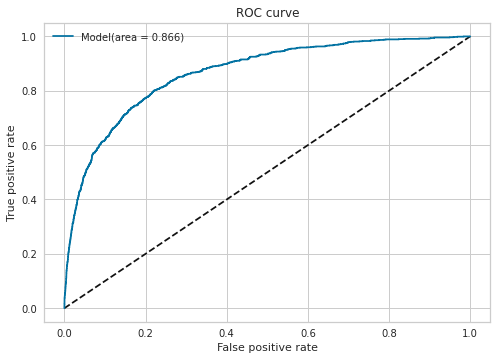

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 1 | AUC: 0.8611598938983577
Fold 1 | AP: 0.379292219452668


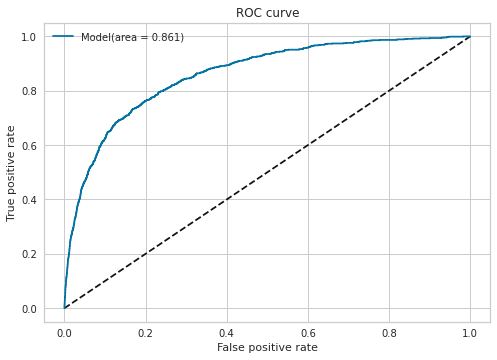

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 2 | AUC: 0.8668629390815906
Fold 2 | AP: 0.40098136396712847


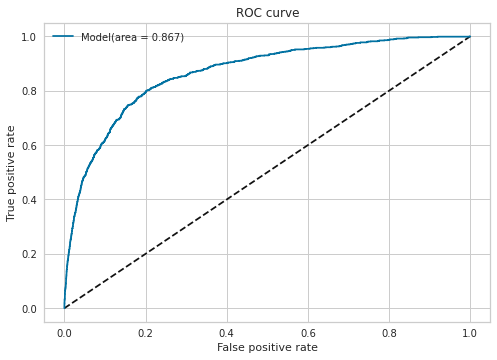

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 3 | AUC: 0.8643201637496598
Fold 3 | AP: 0.39404684599344414


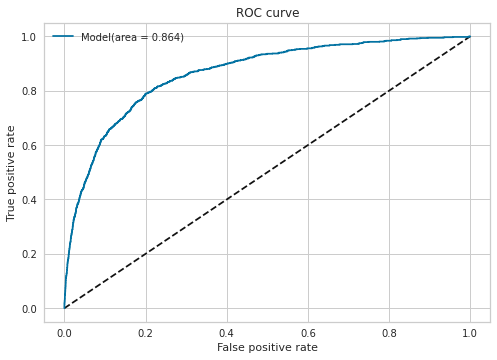

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 4 | AUC: 0.8654409351783188
Fold 4 | AP: 0.3979264775774182


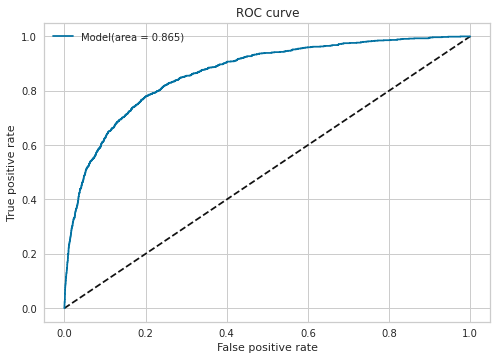

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 5 | AUC: 0.8737750098992159
Fold 5 | AP: 0.4402509617428701


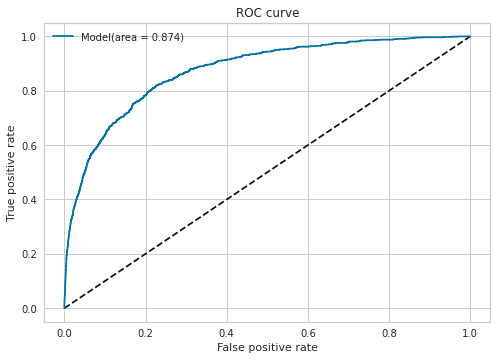

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 6 | AUC: 0.8586249418579615
Fold 6 | AP: 0.3626198678839718


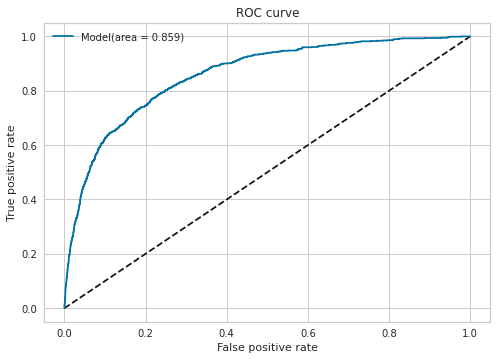

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 7 | AUC: 0.8586598056922303
Fold 7 | AP: 0.40537275313966387


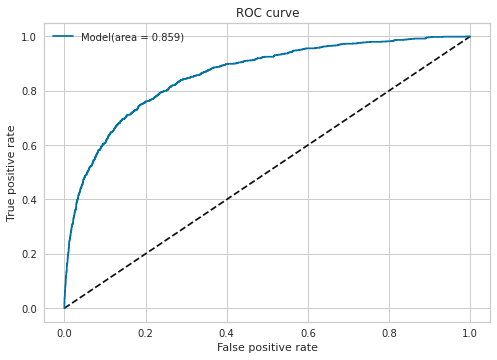

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 8 | AUC: 0.8750652716570005
Fold 8 | AP: 0.44248855688486455


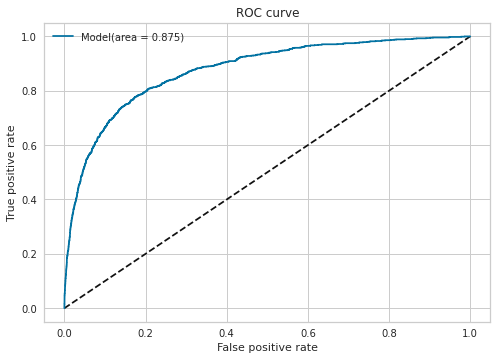

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
Fold 9 | AUC: 0.8640952842136842
Fold 9 | AP: 0.37326552455008405


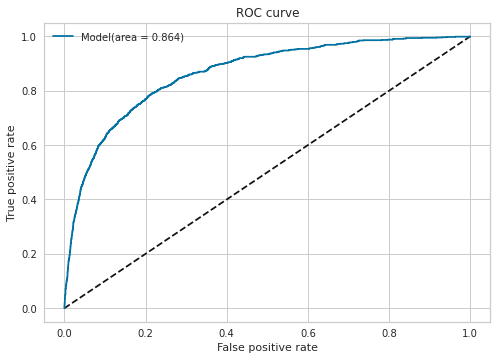


Overall mean auc : 0.865375820147744

Overall mean mean average : 0.4001020218507312
CPU times: user 1h 23min 29s, sys: 23 s, total: 1h 23min 52s
Wall time: 21min 47s


In [34]:
%%time 
# evaluate each strategy on the dataset
results = list()
# Setting a 10-fold stratified cross-validation (note: shuffle=True)
SEED = 42
FOLDS = 10
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
# CV interations
# Create arrays for the features and the response variable
roc_auc = list()
average_precision = list()
#X1=X.iloc[0:2000,:].copy()
#y1=y[0:2000].copy()
oof = np.empty((X.shape[0],))
#oof_bin = np.empty((X.shape[0],))
predictions=[]
mean_auc = 0
mean_ap=0
best_iteration = list()
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):    
    X_train, y_train = X.iloc[list(train_idx), :], y.iloc[list(train_idx)]
    X_test, y_test = X.iloc[list(test_idx), :],y.iloc[list(test_idx)]
    pipe_lgbm_woe_powertransformer.fit(X_train,y_train)
    preds = pipe_lgbm_woe_powertransformer.predict_proba(X_test)[:,1]
    oof[test_idx] = preds
    auc_score= roc_auc_score(y_true=y_test, y_score=preds)
    roc_auc.append(auc_score)
    print(f"Fold {fold} | AUC: {auc_score}")
    ap=average_precision_score(y_true=y_test, y_score=preds)
    average_precision.append(ap)
    print(f"Fold {fold} | AP: {ap}")
    plot_roc(y_test,preds)
    mean_auc += auc_score / FOLDS
    mean_ap+=ap/FOLDS
    predictions.append(pipe_lgbm_woe_powertransformer.predict_proba(X_test_final)[:,1]) 
    #Mean of the predictions
print(f"\nOverall mean auc : {mean_auc}")
print(f"\nOverall mean mean average : {mean_ap}")

In [35]:
#pipe_lgbm_woe_powertransformer.fit(X,y)
#predictions =pipe_lgbm_woe_powertransformer.predict_proba(X_test_final)[:,1]

In [36]:
predictions = np.mean(np.column_stack(predictions), axis=1)

In [37]:
# Save the predictions to a CSV file
sub = pd.read_csv('../input/GiveMeSomeCredit/sampleEntry.csv')
sub['Probability']=predictions
sub.to_csv('pipe_lgbm_woe_powertransformer_estimator_XGB_CV_onlynum_fe_V3.csv', index=False)
sub

,Id,Probability
0,1,0.060599
1,2,0.041063
2,3,0.015531
3,4,0.068244
4,5,0.108679
...,...,...
101498,101499,0.032904
101499,101500,0.394093
101500,101501,0.009195
101501,101502,0.067507
